In [35]:
import pandas as pd

# upload csv file
data = pd.read_csv(r'C:\Users\Hp\Desktop\emails.csv', encoding='latin-1')

# examine the first few columns of the data structure
print(data.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [36]:
# separating labels and features
X = data.drop(columns=['Prediction'])  # features
y = data['Prediction']  # labels

In [37]:
from sklearn.model_selection import train_test_split

# splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim seti büyüklüğü: {len(X_train)}")
print(f"Test seti büyüklüğü: {len(X_test)}")

Eğitim seti büyüklüğü: 4137
Test seti büyüklüğü: 1035


In [38]:
# removing 'Email No.' column
X = data.drop(columns=['Email No.', 'Prediction'])

# seperate the labels
y = data['Prediction']

# check data types
print(X.dtypes)

# convert all columns to numeric type (float)
X = X.astype('float32')

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object


In [39]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Email No.         0
the               0
to                0
ect               0
and               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3001, dtype: int64
Email No.         0
the               0
to                0
ect               0
and               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3001, dtype: int64


In [40]:
print(X_train.dtypes)
print(y_train.dtypes)

Email No.         object
the                int64
to                 int64
ect                int64
and                int64
                   ...  
infrastructure     int64
military           int64
allowing           int64
ff                 int64
dry                int64
Length: 3001, dtype: object
int64


In [41]:
import numpy as np

# check the missing values
print(X.isnull().sum())

# check infinity values
print(np.isinf(X).sum())

# if they exist, editing them is required
X = X.fillna(X.mean())  # filling NaN values with average

# substitute a numerical value for infinity values (for example 0 or the maximum value)
X = X.replace([np.inf, -np.inf], 0)

the               0
to                0
ect               0
and               0
for               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3000, dtype: int64
the               0
to                0
ect               0
and               0
for               0
                 ..
infrastructure    0
military          0
allowing          0
ff                0
dry               0
Length: 3000, dtype: int64


In [42]:
from sklearn.preprocessing import LabelEncoder

# if we need to convert y into binary labels:
encoder = LabelEncoder()
y = encoder.fit_transform(y)  #  converts "spam" -> 1, "ham" -> 0

In [43]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [44]:
from sklearn.model_selection import train_test_split

# separate training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the sizes of training and test sets
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 4137
Test seti boyutu: 1035


In [45]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# creating the model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # first layer
    Dense(64, activation='relu'),  # middle layer
    Dense(1, activation='sigmoid')  # output layer (binary classification)
])

# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7650 - loss: 0.7618 - val_accuracy: 0.9401 - val_loss: 0.1688
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9589 - loss: 0.1339 - val_accuracy: 0.9662 - val_loss: 0.1577
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.1276 - val_accuracy: 0.9739 - val_loss: 0.1049
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9881 - loss: 0.0556 - val_accuracy: 0.9517 - val_loss: 0.2266
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9897 - loss: 0.0410 - val_accuracy: 0.9507 - val_loss: 0.2748
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9852 - loss: 0.0710 - val_accuracy: 0.9768 - val_loss: 0.0741
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9946 - loss: 0.0245 - val_accuracy: 0.9700 - val_loss: 0.1337
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9984 - loss: 0.0111 - val_accuracy: 0.9807 - val_loss

In [48]:
# model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model (already done)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# output of the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9872 - loss: 0.0569 - val_accuracy: 0.9816 - val_loss: 0.1191
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9988 - loss: 0.0092 - val_accuracy: 0.9797 - val_loss: 0.1230
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9981 - loss: 0.0081 - val_accuracy: 0.9729 - val_loss: 0.1757
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9836 - val_loss: 0.1386
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9993 - loss: 0.0023 - val_accuracy: 0.9758 - val_loss: 0.1911
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9826 - val_loss: 0.1490
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 6.7368e-04 - val_accuracy: 0.9826 - val_loss: 0.1667
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 5.2767e-04 - val_accuracy: 0.9816 - 

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.5124e-04 - val_accuracy: 0.9826 - val_loss: 0.1902
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.2314e-04 - val_accuracy: 0.9826 - val_loss: 0.1940
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.2699e-05 - val_accuracy: 0.9816 - val_loss: 0.1940
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 6.2232e-05 - val_accuracy: 0.9836 - val_loss: 0.2028
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.2376e-05 - val_accuracy: 0.9816 - val_loss: 0.2010
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.6135e-05 - val_accuracy: 0.9816 - val_loss: 0.1989
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.3259e-05 - val_accuracy: 0.9816 - val_loss: 0.2048
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 3.0025e-05 - 

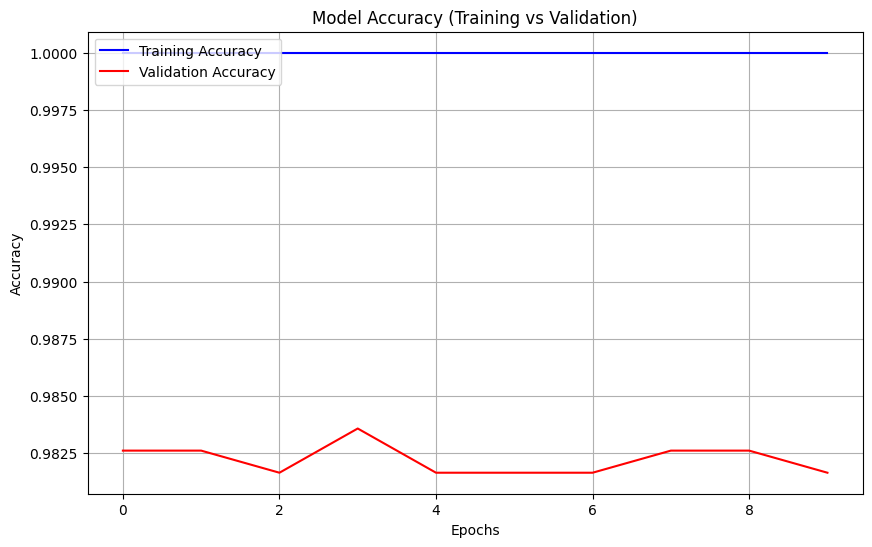

In [49]:
import matplotlib.pyplot as plt

# after training the model, we get the accuracy data from the history object.
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# visualization of training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.title('Model Accuracy (Training vs Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


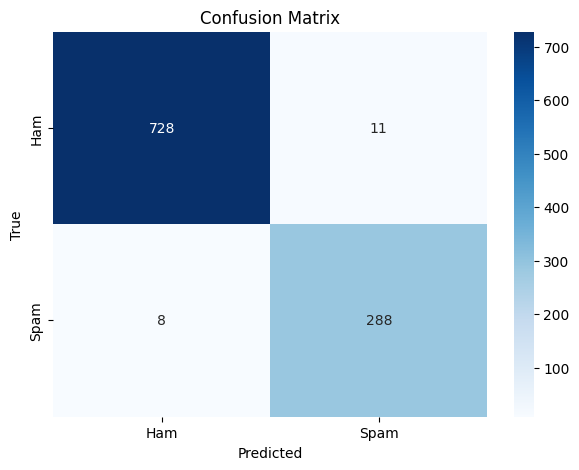

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get the predictions of the model
y_pred = (model.predict(X_test) > 0.5)  # for binary classification we take the predictions as 0 or 1

# calculation of confusion matrix
cm = confusion_matrix(y_test, y_pred)

# we draw a heatmap with seaborn to visualize the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
print(data.columns)

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [52]:
from sklearn.metrics import classification_report

# predictions of the model
y_pred = model.predict(X_test)

# make sure that the predictions are in binary format
y_pred = (y_pred > 0.5)

# classification report
print(classification_report(y_test, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.96      0.97      0.97       296

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [53]:
import pandas as pd

# we take the model's predictions and make them one-dimensional
y_pred = (model.predict(X_test) > 0.5).flatten()  # we perform binary classification of predictions with a threshold value of 0.5.

# to see the first 20 rows, we combine the actual labels (y_test) and the predicted labels (y_pred)
results = pd.DataFrame({'True Label': y_test[:20], 'Predicted Label': y_pred[:20]})

# we print the first 20 lines to the screen
print(results)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    True Label  Predicted Label
0            0            False
1            0            False
2            1             True
3            0            False
4            0            False
5            0            False
6            1             True
7            0            False
8            0            False
9            0            False
10           1             True
11           0            False
12           1             True
13           0            False
14           1             True
15           1             True
16           0            False
17           0            False
18           0            False
19           0            False


In [54]:
# saving the model
model.save('spam_classifier_model.h5')

# reloading the model
from tensorflow.keras.models import load_model
model = load_model('spam_classifier_model.h5')